# Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, roc_curve, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostClassifier
from catboost import cv
from catboost import Pool
import catboost as cat
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
warnings.filterwarnings('error')
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')
import packaging.version

In [2]:
contract=pd.read_csv('contract.csv')
internet=pd.read_csv('internet.csv')
personal=pd.read_csv('personal.csv')
phone=pd.read_csv('phone.csv')

In [3]:
for data in [contract, internet, personal, phone]: 
    display(data.head())
    (print('*' * 70))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


**********************************************************************


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


**********************************************************************


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


**********************************************************************


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


**********************************************************************


In [4]:
for data in [contract, internet, personal, phone]:
    display(data.info())
    (print('*' * 70))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

**********************************************************************


In [5]:
contract['Client_left'] = contract['EndDate'].apply(lambda x: 1 if x == 'No' else 0)
contract['Client_left'].value_counts()

1    5174
0    1869
Name: Client_left, dtype: int64

In [6]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Client_left
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,1
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,1
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,0


Столбец дополнительный создали, но для начала попробую объединить все данные в один датафрейм

In [7]:
data = contract.merge(internet, on ='customerID', how = 'left')
data = data.merge(personal, on ='customerID', how = 'left')
data = data.merge(phone, on ='customerID', how = 'left')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Client_left       7043 non-null   int64  
 9   InternetService   5517 non-null   object 
 10  OnlineSecurity    5517 non-null   object 
 11  OnlineBackup      5517 non-null   object 
 12  DeviceProtection  5517 non-null   object 
 13  TechSupport       5517 non-null   object 
 14  StreamingTV       5517 non-null   object 
 15  StreamingMovies   5517 non-null   object 
 16  gender            7043 non-null   object 


У нас появились пропуски в данных. Связно это с тем, что если услуга не оказывалась тому или иному клиенту, то её просто не указывают для данного кликнта, отсюда появились и пустые значения. Предлагаю заполнить данные проспуски на значение - NA (Not Applicable)

In [9]:
empty_values= ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for empty in empty_values:
    data[empty] = data[empty].fillna('NA')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Client_left       7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  gender            7043 non-null   object 


In [11]:
#проверка на дубликаты
data.index.duplicated().sum()

0

In [12]:
# data['TotalCharges'] = data['TotalCharges'].astype('float') не смог перевести, кажется тут есть пропуски, посмотрю на этот столбец отдельно
data.query('TotalCharges == " "') 

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Client_left,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,1,DSL,...,No,Yes,Yes,Yes,No,Female,0,Yes,Yes,NA
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,1,NA,...,NA,NA,NA,NA,NA,Male,0,No,Yes,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,1,DSL,...,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,1,NA,...,NA,NA,NA,NA,NA,Male,0,Yes,Yes,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,1,DSL,...,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,NA
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,1,NA,...,NA,NA,NA,NA,NA,Male,0,Yes,Yes,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,1,NA,...,NA,NA,NA,NA,NA,Male,0,Yes,Yes,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,1,NA,...,NA,NA,NA,NA,NA,Female,0,Yes,Yes,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,1,NA,...,NA,NA,NA,NA,NA,Male,0,Yes,Yes,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,1,DSL,...,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,Yes


In [13]:
data.loc[data['TotalCharges'] == ' ', 'TotalCharges'] = data['MonthlyCharges']
data['TotalCharges'] = data['TotalCharges'].astype('float')

In [14]:
data['BeginDate']=pd.to_datetime(data['BeginDate'],format = '%Y-%m-%d')
data['EndDate']=pd.to_datetime(data.loc[data['EndDate'] != 'No','EndDate'],format = '%Y-%m-%dT%H:%M:%S')

In [15]:
data['EndDate'].fillna('Active',inplace = True) #заменим значение No на Active для удобства

In [16]:
data.info()#проверяем

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Client_left       7043 non-null   int64         
 9   InternetService   7043 non-null   object        
 10  OnlineSecurity    7043 non-null   object        
 11  OnlineBackup      7043 non-null   object        
 12  DeviceProtection  7043 non-null   object        
 13  TechSupport       7043 non-null   object        
 14  StreamingTV       7043 n

In [17]:
data.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Client_left,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,Active,Month-to-month,Yes,Electronic check,29.85,29.85,1,DSL,...,Yes,No,No,No,No,Female,0,Yes,No,NA
1,5575-GNVDE,2017-04-01,Active,One year,No,Mailed check,56.95,1889.50,1,DSL,...,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,0,DSL,...,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,Active,One year,No,Bank transfer (automatic),42.30,1840.75,1,DSL,...,No,Yes,Yes,No,No,Male,0,No,No,NA
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,0,Fiber optic,...,No,No,No,No,No,Female,0,No,No,No
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.50,0,Fiber optic,...,No,Yes,No,Yes,Yes,Female,0,No,No,Yes
6,1452-KIOVK,2018-04-01,Active,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,1,Fiber optic,...,Yes,No,No,Yes,No,Male,0,No,Yes,Yes
7,6713-OKOMC,2019-04-01,Active,Month-to-month,No,Mailed check,29.75,301.90,1,DSL,...,No,No,No,No,No,Female,0,No,No,NA
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,0,Fiber optic,...,No,Yes,Yes,Yes,Yes,Female,0,Yes,No,Yes
9,6388-TABGU,2014-12-01,Active,One year,No,Bank transfer (automatic),56.15,3487.95,1,DSL,...,Yes,No,No,No,No,Male,0,No,Yes,No


In [18]:
data['Services'] = 0 #все услуги
data.loc[data['MultipleLines'] == 'NA', 'Services'] = 1
data.loc[data['InternetService'] == 'NA', 'Services'] = 2

In [19]:
data['Services'].value_counts()

0    4835
2    1526
1     682
Name: Services, dtype: int64

In [20]:
data['EndDate'] = data['EndDate'].fillna('No')

In [21]:
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Client_left,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Services
0,7590-VHVEG,2020-01-01,Active,Month-to-month,Yes,Electronic check,29.85,29.85,1,DSL,...,No,No,No,No,Female,0,Yes,No,NA,1
1,5575-GNVDE,2017-04-01,Active,One year,No,Mailed check,56.95,1889.50,1,DSL,...,Yes,No,No,No,Male,0,No,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,0,DSL,...,No,No,No,No,Male,0,No,No,No,0
3,7795-CFOCW,2016-05-01,Active,One year,No,Bank transfer (automatic),42.30,1840.75,1,DSL,...,Yes,Yes,No,No,Male,0,No,No,NA,1
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,0,Fiber optic,...,No,No,No,No,Female,0,No,No,No,0


In [22]:
data_left = data[data['EndDate'] != 'Active']

In [23]:
data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [24]:
data_left['MonthlyCharges'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

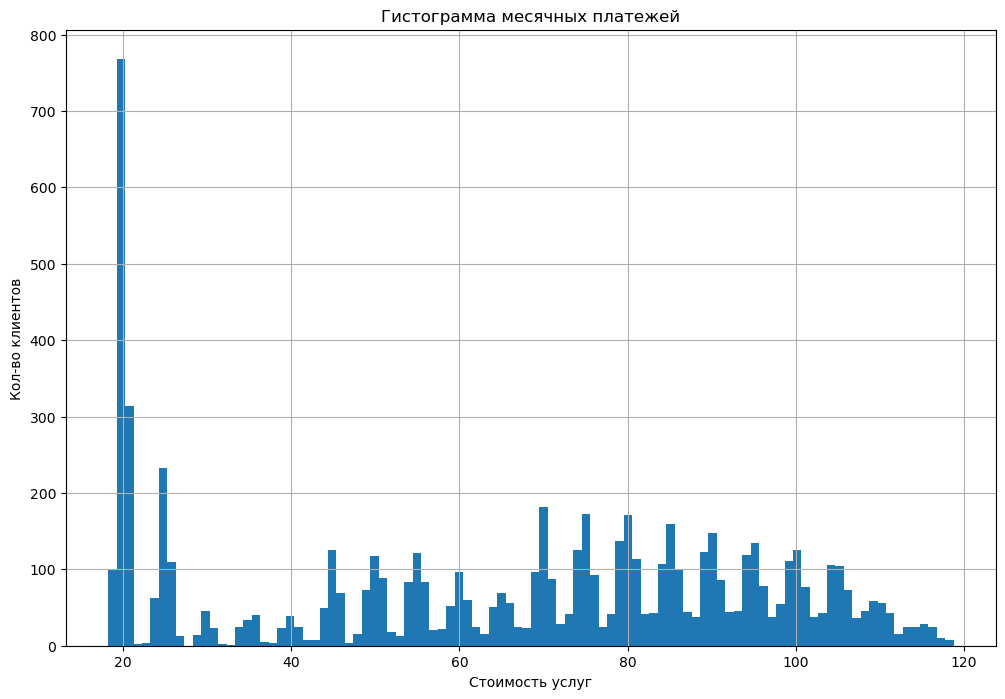

In [25]:
plt.figure(figsize =(12,8))
data['MonthlyCharges'].plot(kind = 'hist', bins = 100, grid =True)
plt.title('Гистограмма месячных платежей')
plt.xlabel('Стоимость услуг')
plt.ylabel('Кол-во клиентов')
plt.show()

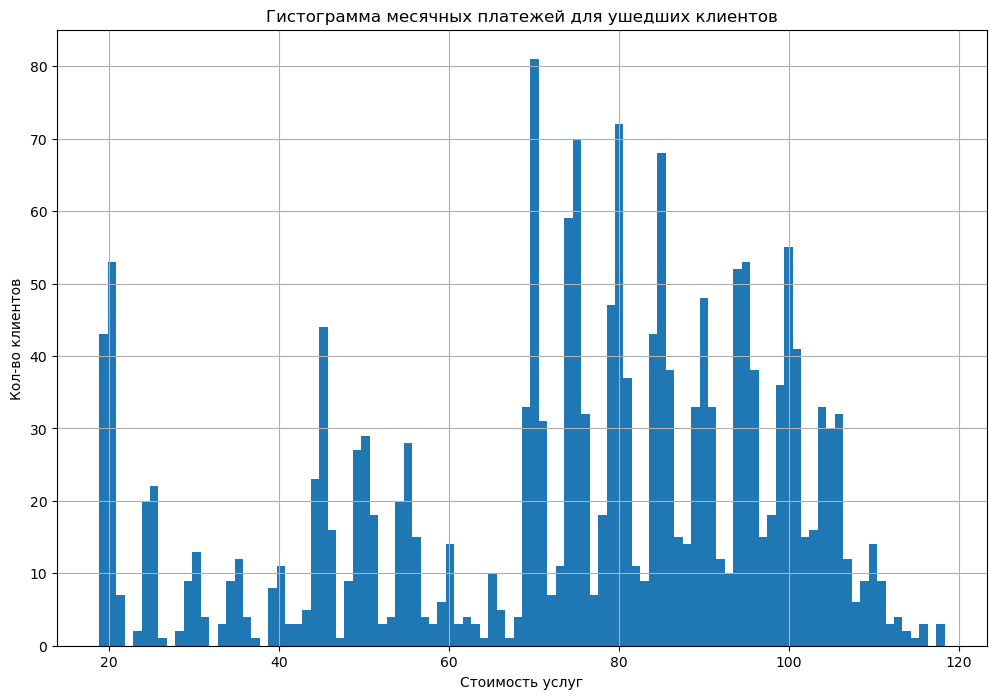

In [26]:
plt.figure(figsize =(12,8))
data_left['MonthlyCharges'].plot(kind = 'hist', bins = 100, grid =True)
plt.title('Гистограмма месячных платежей для ушедших клиентов')
plt.xlabel('Стоимость услуг')
plt.ylabel('Кол-во клиентов')
plt.show()

In [27]:
data['Begin_Year'] = pd.DatetimeIndex(data['BeginDate']).year #округлим до года для удобства просмотра

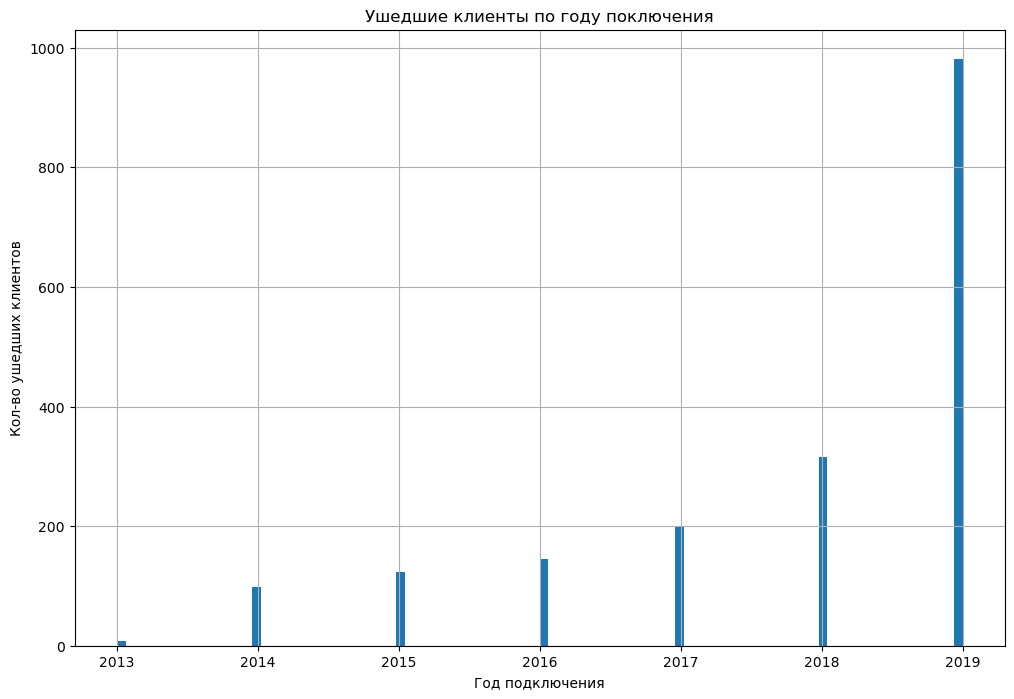

In [28]:
plt.figure(figsize =(12,8))
data.query('Client_left == 0')['Begin_Year'].plot(kind = 'hist', bins = 100, grid =True)
plt.title('Ушедшие клиенты по году поключения')
plt.xlabel('Год подключения')
plt.ylabel('Кол-во ушедших клиентов')
plt.show()

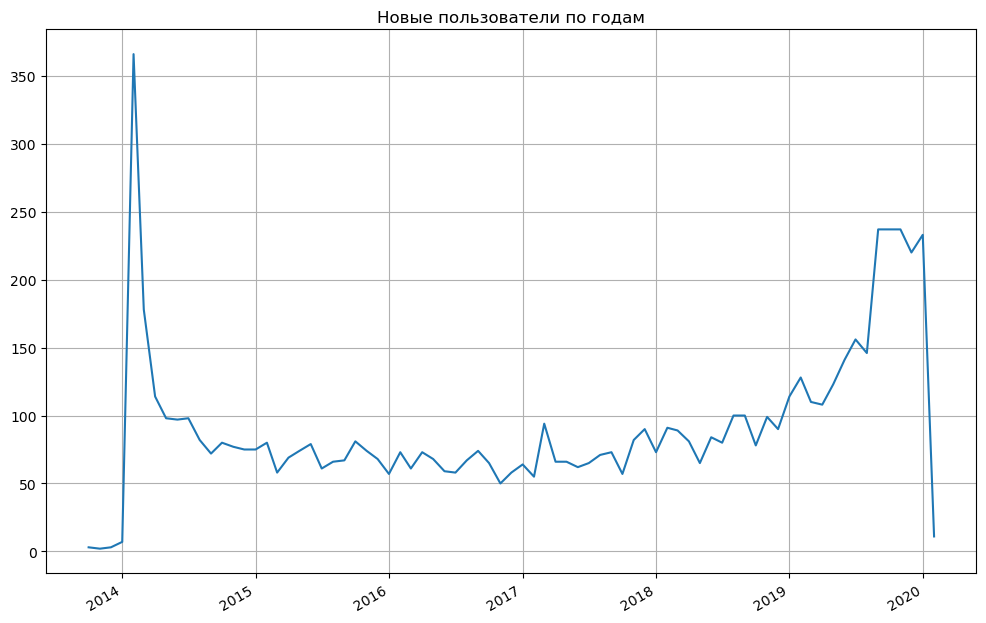

In [29]:
data['BeginDate'].value_counts().plot(grid = True, figsize = (12,8))
plt.title('Новые пользователи по годам')
plt.show()

In [30]:
df = data

In [31]:
data['MultipleLines'] = pd.Series(np.where(data['MultipleLines'].values == 'Yes', 1, 0),data.index)
data['Dependents'] = pd.Series(np.where(data['Dependents'].values == 'Yes', 1, 0),data.index)
data['Partner'] = pd.Series(np.where(data['Partner'].values == 'Yes', 1, 0),data.index)
data['gender'] = pd.Series(np.where(data['gender'].values == 'Female', 1, 0),data.index)
data['StreamingMovies'] = pd.Series(np.where(data['StreamingMovies'].values == 'Yes', 1, 0),data.index)
data['StreamingTV'] = pd.Series(np.where(data['StreamingTV'].values == 'Yes', 1, 0),data.index)
data['TechSupport'] = pd.Series(np.where(data['TechSupport'].values == 'Yes', 1, 0),data.index)
data['DeviceProtection'] = pd.Series(np.where(data['DeviceProtection'].values == 'Yes', 1, 0),data.index)
data['OnlineBackup'] = pd.Series(np.where(data['OnlineBackup'].values == 'Yes', 1, 0),data.index)
data['OnlineSecurity'] = pd.Series(np.where(data['OnlineSecurity'].values == 'Yes', 1, 0),data.index)
data['PaperlessBilling'] = pd.Series(np.where(data['PaperlessBilling'].values == 'Yes',1,0),data.index)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   int32         
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Client_left       7043 non-null   int64         
 9   InternetService   7043 non-null   object        
 10  OnlineSecurity    7043 non-null   int32         
 11  OnlineBackup      7043 non-null   int32         
 12  DeviceProtection  7043 non-null   int32         
 13  TechSupport       7043 non-null   int32         
 14  StreamingTV       7043 n

In [33]:
data.head(1)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Client_left,InternetService,...,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Services,Begin_Year
0,7590-VHVEG,2020-01-01,Active,Month-to-month,1,Electronic check,29.85,29.85,1,DSL,...,0,0,0,1,0,1,0,0,1,2020


In [34]:
data = pd.get_dummies(df, columns = ['Type', 'InternetService','PaymentMethod'], drop_first = True)

In [35]:
data['BeginDate'].max()

Timestamp('2020-02-01 00:00:00')

In [36]:
data['EndDate'] = data['EndDate'].replace('Active', '2020-02-01')

In [37]:
data.head(1)

,customerID,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,Client_left,OnlineSecurity,OnlineBackup,DeviceProtection,...,MultipleLines,Services,Begin_Year,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_NA,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,2020-01-01,2020-02-01,1,29.85,29.85,1,0,1,0,...,0,1,2020,0,0,0,0,0,1,0


In [38]:
data

,customerID,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,Client_left,OnlineSecurity,OnlineBackup,DeviceProtection,...,MultipleLines,Services,Begin_Year,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_NA,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,2020-01-01,2020-02-01,1,29.85,29.85,1,0,1,0,...,0,1,2020,0,0,0,0,0,1,0
1,5575-GNVDE,2017-04-01,2020-02-01,0,56.95,1889.50,1,1,0,1,...,0,0,2017,1,0,0,0,0,0,1
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,1,53.85,108.15,0,1,1,0,...,0,0,2019,0,0,0,0,0,0,1
3,7795-CFOCW,2016-05-01,2020-02-01,0,42.30,1840.75,1,1,0,1,...,0,1,2016,1,0,0,0,0,0,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,1,70.70,151.65,0,0,0,0,...,0,0,2019,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,1,84.80,1990.50,1,1,0,1,...,1,0,2018,1,0,0,0,0,0,1
7039,2234-XADUH,2014-02-01,2020-02-01,1,103.20,7362.90,1,0,1,1,...,1,0,2014,1,0,1,0,1,0,0
7040,4801-JZAZL,2019-03-01,2020-02-01,1,29.60,346.45,1,1,0,0,...,0,1,2019,0,0,0,0,0,1,0
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,1,74.40,306.60,0,0,0,0,...,1,0,2019,0,0,1,0,0,0,1


In [39]:
data['lasted'] = (pd.to_datetime(data['EndDate']) - data['BeginDate']).dt.days

In [40]:
data.rename({'lasted': 'duration'}, axis=1, inplace=True)

In [41]:
data.head(1)

,customerID,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,Client_left,OnlineSecurity,OnlineBackup,DeviceProtection,...,Services,Begin_Year,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_NA,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,duration
0,7590-VHVEG,2020-01-01,2020-02-01,1,29.85,29.85,1,0,1,0,...,1,2020,0,0,0,0,0,1,0,31


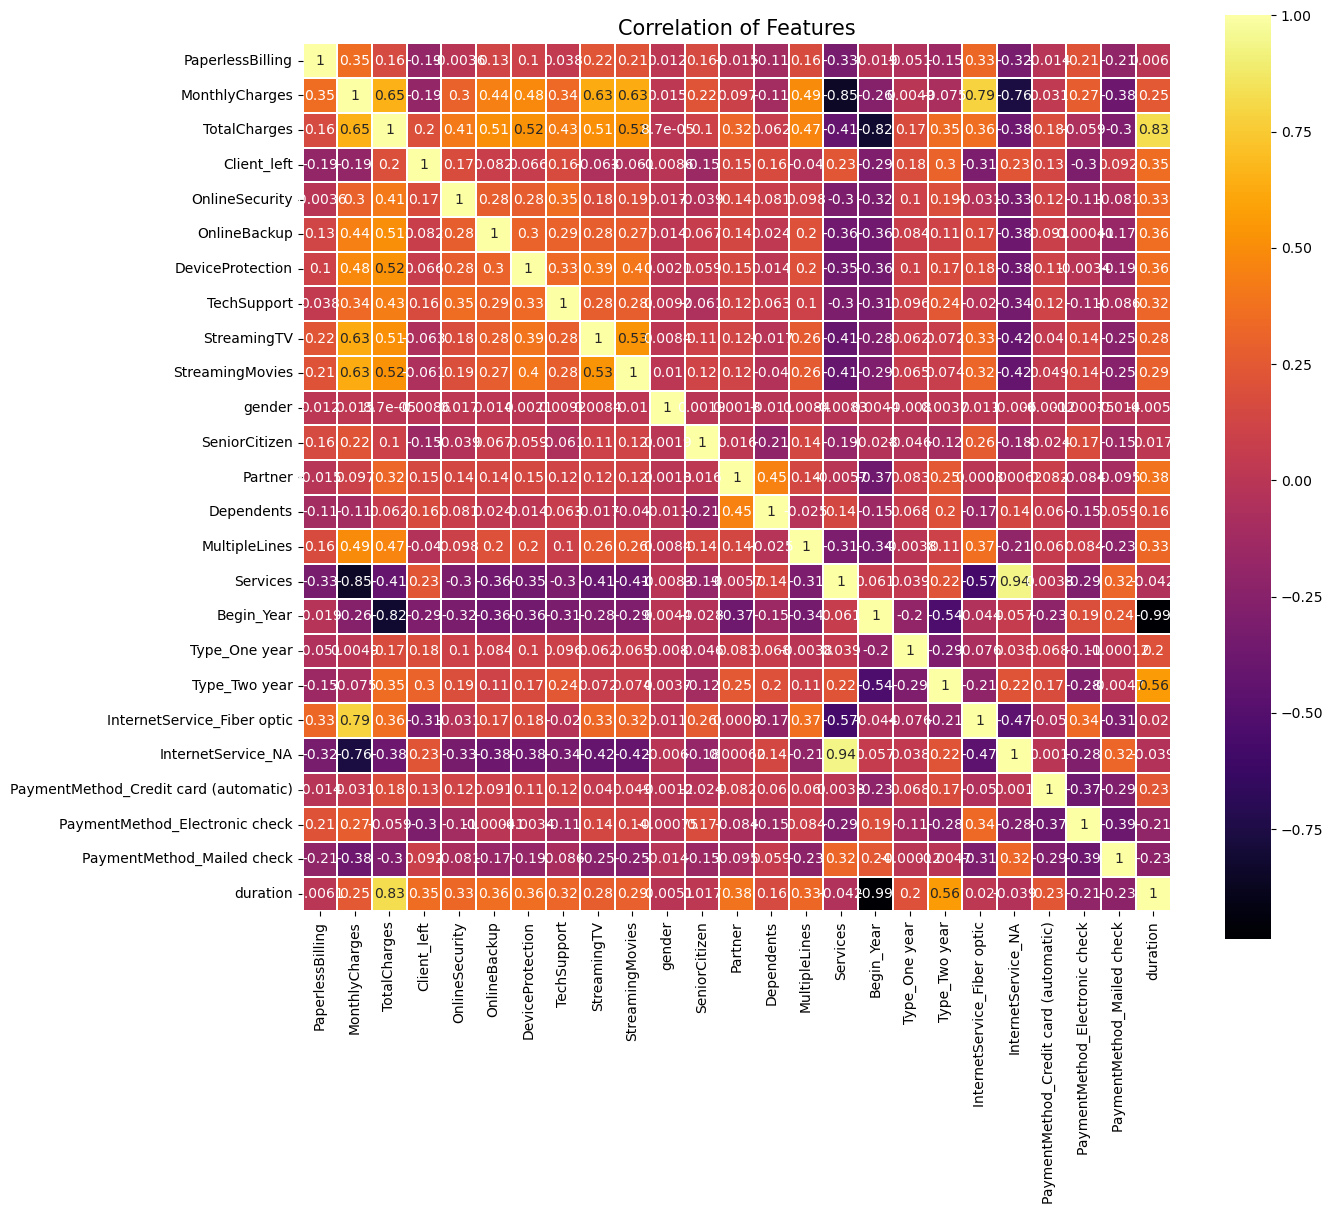

In [42]:
colormap = plt.cm.inferno
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, fmt='.2g')
plt.show()

In [ ]:
#0 - мужчины, 1 - женщины
main_columns_1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',  'InternetService', 
                  'PaymentMethod', 'PaperlessBilling', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'services', 'Type']

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
# пройдемся по каждому основному столбцу
for ax, column in zip(axes.ravel(), main_columns_1):
    # посчитаем распределение по уникальным значениям столбца, сразу же нормализуем их
    data = (dataset[column].value_counts() / len(dataset)).to_frame().reset_index()
    sns.barplot(y=data.columns[1], x='index', data=data, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set(ylabel=None, xlabel=None)
    ax.set_title(f'Распределение по {column}')
    ax.grid()
    #ax.legent()
    sns.set_palette('rainbow')
    # добавим значения столбцов на диаграммы
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.0%}', (x+width/2, y+height*1.02), ha='center')

plt.tight_layout()
plt.show()

In [95]:
data

,customerID,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,Client_left,OnlineSecurity,OnlineBackup,DeviceProtection,...,Services,Begin_Year,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_NA,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,duration
0,7590-VHVEG,2020-01-01,2020-02-01,1,29.85,29.85,1,0,1,0,...,1,2020,0,0,0,0,0,1,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,0,56.95,1889.50,1,1,0,1,...,0,2017,1,0,0,0,0,0,1,1036
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,1,53.85,108.15,0,1,1,0,...,0,2019,0,0,0,0,0,0,1,61
3,7795-CFOCW,2016-05-01,2020-02-01,0,42.30,1840.75,1,1,0,1,...,1,2016,1,0,0,0,0,0,0,1371
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,1,70.70,151.65,0,0,0,0,...,0,2019,0,0,1,0,0,1,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,1,84.80,1990.50,1,1,0,1,...,0,2018,1,0,0,0,0,0,1,730
7039,2234-XADUH,2014-02-01,2020-02-01,1,103.20,7362.90,1,0,1,1,...,0,2014,1,0,1,0,1,0,0,2191
7040,4801-JZAZL,2019-03-01,2020-02-01,1,29.60,346.45,1,1,0,0,...,1,2019,0,0,0,0,0,1,0,337
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,1,74.40,306.60,0,0,0,0,...,0,2019,0,0,1,0,0,0,1,123


In [96]:
data.drop('EndDate', axis = 1, inplace = True)
data.drop('BeginDate', axis = 1, inplace = True)

In [97]:
data.drop('TotalCharges', axis = 1, inplace = True)

In [98]:
data.drop('customerID', axis = 1, inplace = True)

In [99]:
data.drop('Services', axis = 1, inplace = True)
data.drop('Begin_Year', axis = 1, inplace = True)

In [100]:
data

,PaperlessBilling,MonthlyCharges,Client_left,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Dependents,MultipleLines,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_NA,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,duration
0,1,29.85,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,31
1,0,56.95,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1036
2,1,53.85,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,61
3,0,42.30,1,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1371
4,1,70.70,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,84.80,1,1,0,1,1,1,1,0,...,1,1,1,0,0,0,0,0,1,730
7039,1,103.20,1,0,1,1,0,1,1,1,...,1,1,1,0,1,0,1,0,0,2191
7040,1,29.60,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,337
7041,1,74.40,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,123


# Моделирование

In [101]:
train_df, test_df = train_test_split(data, test_size = 0.2, random_state = 250722)

In [102]:
features_train = train_df.drop('Client_left', axis = 1)
features_test = test_df.drop('Client_left', axis = 1)

In [103]:
target_train = train_df['Client_left']
target_test = test_df['Client_left']

In [104]:
train_df, test_df = train_test_split(data, test_size = 0.2, random_state = 250722)

In [105]:
features_train = train_df.drop('Client_left', axis = 1)
features_test = test_df.drop('Client_left', axis = 1)

target_train = train_df['Client_left']
target_test = test_df['Client_left']

## CatBoostClassifier

In [106]:
train_dataset = Pool(features_train, target_train)
test_dataset = Pool(features_test, target_test)

In [107]:
model = CatBoostClassifier(loss_function = 'CrossEntropy',learning_rate = 0.03, random_state = 250722)
model.fit(train_dataset, eval_set = test_dataset, verbose = False)
Cat_Model_Prediction_Proba = model.predict_proba(features_test)[:,1]
roc_auc_score(target_test, Cat_Model_Prediction_Proba)

0.9255700317138681

In [108]:
Cat_boost_train = features_train[['duration','MonthlyCharges','Type_Two year',\
                              'InternetService_Fiber optic','PaymentMethod_Electronic check','PaperlessBilling','Type_One year','TechSupport', 'gender']]
Cat_boost_test = features_test[['duration','MonthlyCharges','Type_Two year',\
                              'InternetService_Fiber optic','PaymentMethod_Electronic check','PaperlessBilling','Type_One year','TechSupport', 'gender']]
train_dataset = Pool(Cat_boost_train, target_train)
test_dataset = Pool(Cat_boost_test, target_test)

In [109]:
modelCat = CatBoostClassifier( random_state = 250722)
Cat_GRID = GridSearchCV(modelCat,{  # Определение объекта кросс-валидации для CatBoostingClassifier
    'iterations': [500],
    'learning_rate' : [0.03],
    'depth' : range(3,15,3),
    'verbose' : [False]
}, cv = 5,scoring = 'roc_auc')

In [110]:
Cat_GRID.fit(Cat_boost_train, target_train)  # Обучение модели CatBoostingClassifier на кросс-валидации

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000023C783E03A0>,
             param_grid={'depth': range(3, 15, 3), 'iterations': [500],
                         'learning_rate': [0.03], 'verbose': [False]},
             scoring='roc_auc')

In [111]:
Cat_GRID.best_score_ 

0.9024919727080117

In [112]:
Cat_GRID.best_estimator_ 

In [113]:
Cat_GRID.best_params_ # Получение лучших параметров для классификаторов полученных на кросс-валидации

{'depth': 6, 'iterations': 500, 'learning_rate': 0.03, 'verbose': False}

In [114]:
modelCat = CatBoostClassifier(loss_function = 'CrossEntropy',iterations = 1000, depth = 6,learning_rate = 0.03, random_state = 250722)

In [115]:
modelCat.fit(train_dataset, eval_set = test_dataset, verbose = False)

In [116]:
catPrediction_Proba = modelCat.predict_proba(Cat_boost_test)[:,1]

In [117]:
roc_auc_score(target_test, catPrediction_Proba)

0.9302967700401569

In [118]:
Cat_boost_pred = modelCat.predict(Cat_boost_test)
accuracy_score(target_test,Cat_boost_pred)

0.8914123491838183

## DecisionTreeClassifier

In [119]:
DT = DecisionTreeClassifier(random_state=250722, class_weight = 'balanced')

DT.fit(features_train, target_train)

DT_proba = DT.predict_proba(features_test)[:,1]

roc_auc_score(target_test, DT_proba)

0.7035096328895503

Feature importances:


<BarContainer object of 21 artists>

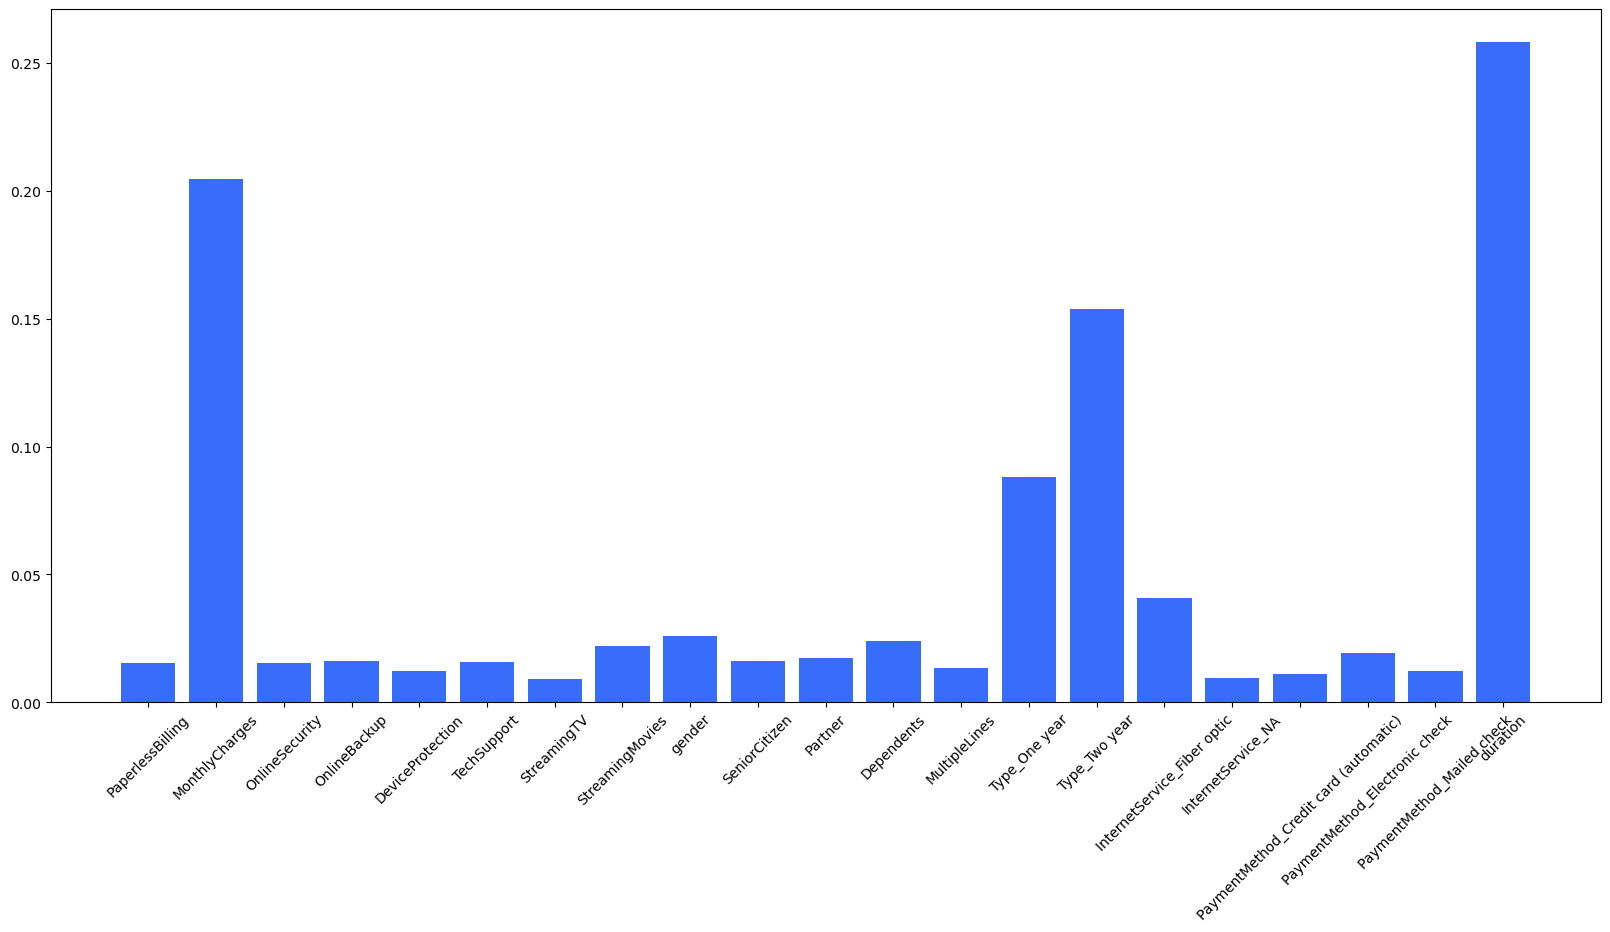

In [120]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=45, fontsize=10) 
feature_importance3 = DT.feature_importances_
col_names = features_train.columns
#indices = np.argsort(feature_import2)[::-1]
print("Feature importances:")
#for f, idx in enumerate(indices):
#    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, col_names[idx], feature_import2[idx]))
plt.bar(col_names,feature_importance3)

In [121]:
DT_train = features_train[['duration','MonthlyCharges','Type_Two year','InternetService_Fiber optic',\
                             'Type_One year','PaymentMethod_Electronic check','gender','InternetService_NA','TechSupport']]

In [122]:
DT_test = features_test[['duration','MonthlyCharges','Type_Two year','InternetService_Fiber optic',\
                             'Type_One year','PaymentMethod_Electronic check','gender','InternetService_NA','TechSupport']]

In [123]:
DTG = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy', class_weight='balanced'),{
    'max_depth': range(1, 10, 20),
    'min_samples_split' : range(4,28,4),
    'min_samples_leaf' : range(3,13,2)
}, cv = 5, scoring = 'roc_auc')

In [124]:
DTG.fit(DT_train,target_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': range(1, 10, 20),
                         'min_samples_leaf': range(3, 13, 2),
                         'min_samples_split': range(4, 28, 4)},
             scoring='roc_auc')

In [125]:
DTG.best_params_

{'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 4}

In [126]:
DTG.best_score_

0.6481243934767025

In [127]:
DTGauc = DecisionTreeClassifier(class_weight = 'balanced', max_depth=1, min_samples_leaf=3, min_samples_split=4, random_state = 250722)

DTGauc.fit(DT_train, target_train)

DTGauc_proba = DTGauc.predict_proba(DT_test)[:,1]

roc_auc_score(target_test, DTGauc_proba)

0.6390568686117135

In [128]:
DT_predict = DTGauc.predict(DT_test)
accuracy_score(target_test,DT_predict)

0.47835344215755854

## Итоговые результаты

In [129]:
results = {
    'Model' : ['CatBoostClassifier',  'DecisionTreeClassifier'],
    'Значение метрики ROC-AUC' :pd.Series([0.930, 0.703]),
    'Значение метрики accuracy': pd.Series([0.891, 0.478]),
    }
pd.DataFrame(results)

,Model,Значение метрики ROC-AUC,Значение метрики accuracy
0,CatBoostClassifier,0.930,0.891
1,DecisionTreeClassifier,0.703,0.478


Можно сделать вывод:

- Модель CatBoostClassifier лучше